In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [24]:
df = pd.read_csv("reparsed.csv")
df.describe()

,classId,pixWidth,pixHeight,normWidth,normHeight,normCenterX,normCenterY
count,2.208620e+05,220862.000000,220862.000000,220862.000000,220862.000000,220862.000000,220862.000000
mean,9.993509e+06,31.105872,40.572919,0.012813,0.034739,0.524324,0.383623
std,2.793933e+00,41.826202,51.334248,0.015841,0.037988,0.232003,0.137193
min,9.993506e+06,2.000000,3.000000,0.000696,0.002027,0.023556,0.064343
25%,9.993506e+06,10.000000,15.000000,0.004091,0.013043,0.345578,0.270433
50%,9.993511e+06,17.000000,23.000000,0.006964,0.021739,0.530118,0.366304
75%,9.993511e+06,34.000000,44.000000,0.014362,0.039663,0.710455,0.483500
max,9.993514e+06,860.000000,1135.000000,0.340116,0.780147,0.976047,0.939940


C:\Users\przem\AppData\Local\Temp\ipykernel_18072\2027307420.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(df["normCenterX"], df["normCenterY"], bins=(150,150), cmap="jet")


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.02355647, 0.02990641, 0.03625635, 0.04260628, 0.04895622,
        0.05530615, 0.06165609, 0.06800603, 0.07435596, 0.0807059 ,
        0.08705584, 0.09340577, 0.09975571, 0.10610565, 0.11245558,
        0.11880552, 0.12515546, 0.13150539, 0.13785533, 0.14420527,
        0.1505552 , 0.15690514, 0.16325508, 0.16960501, 0.17595495,
        0.18230489, 0.18865482, 0.19500476, 0.2013547 , 0.20770463,
        0.21405457, 0.22040451, 0.22675444, 0.23310438, 0.23945431,
        0.24580425, 0.25215419, 0.25850412, 0.26485406, 0.271204  ,
        0.27755393, 0.28390387, 0.29025381, 0.29660374, 0.30295368,
        0.30930362, 0.31565355, 0.32200349, 0.32835343, 0.33470336,
        0.3410533 , 0.34740324, 0.35375317, 0.36010311, 0.36645305,
   

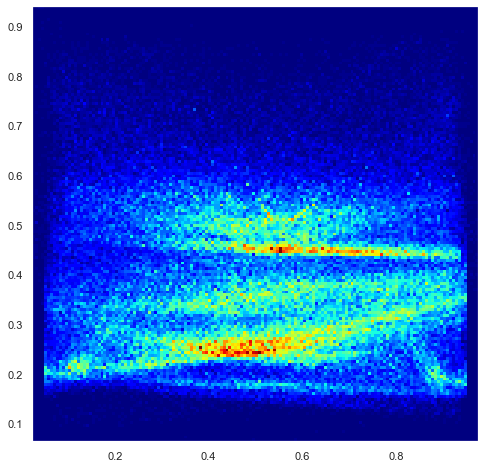

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist2d(df["normCenterX"], df["normCenterY"], bins=(150,150), cmap="jet")

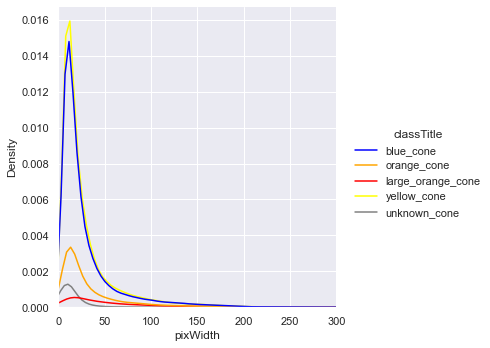

In [26]:
plot  = sns.displot(df, x="pixWidth", hue="classTitle", kind="kde", palette=["blue", "orange", "red", "yellow", "gray"])
plot.set(xlim=(0,300))


# sns.displot(df, x="pixHeight", kind="kde")
# plt.hist(df["pixHeight"], bins=100)

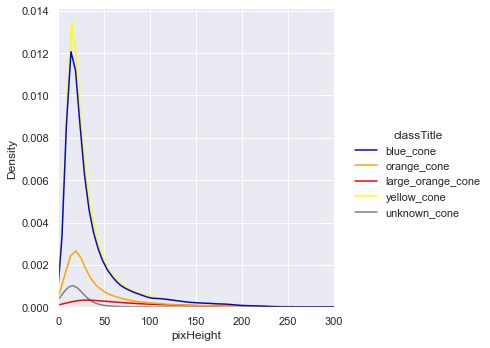

In [27]:
plot  = sns.displot(df, x="pixHeight", hue="classTitle", kind="kde", palette=["blue", "orange", "red", "yellow", "gray"])
plot.set(xlim=(0,300))


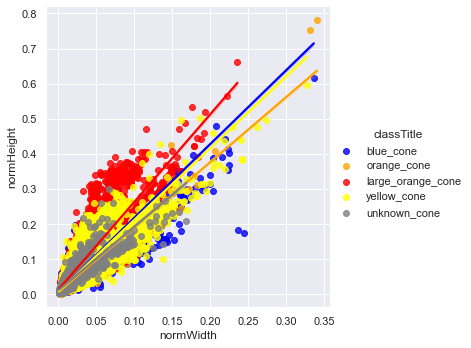

In [28]:
g = sns.lmplot(
    data=df,
    x="normWidth", y="normHeight", hue="classTitle",
    palette=["blue", "orange", "red", "yellow", "gray"],
    height=5
)

Total number of cones is: 220862


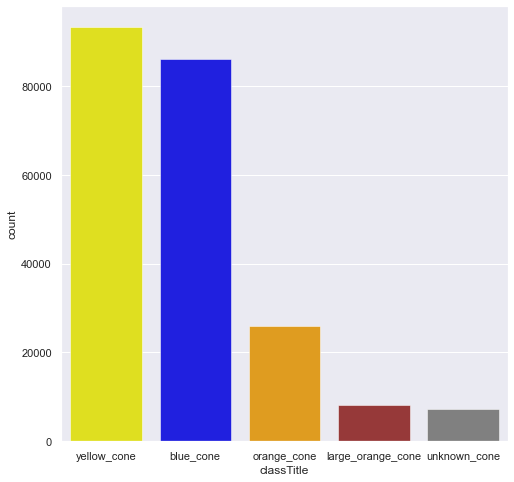

In [29]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(data=df, x='classTitle', order=df.classTitle.value_counts().index, palette=["yellow", "blue", "orange", "brown", "gray"], linewidth = 0.5)
print(f'Total number of cones is: {df.classTitle.value_counts().sum()}')

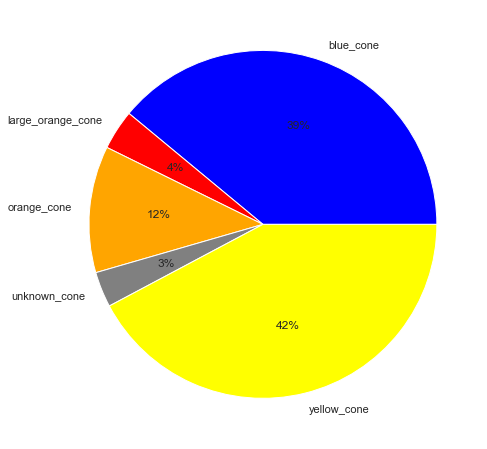

In [30]:
'''
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
'''

cones_data = df.groupby(by = 'classTitle', dropna=True).count().classId 
plt.pie(x = cones_data, labels = cones_data.index, colors = ['blue','red', 'orange', 'gray', 'yellow'], autopct='%.0f%%')

plt.show()